In [31]:
import os 
import pickle 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

dfs = {
    'sae':[],
    'q':[],
    'label_type':[],
    'top_k':[],
    'layer':[],
    'max_accuracy':[],
    
}

for root, dirs, files in os.walk('../outputs/synthetic'):
    for file in files:
        if file.endswith('accuracies.pkl'):
            sae = root.split('/')[-5]
            q = root.split('/')[-4]
            label_type = root.split('/')[-3]
            top_k = int(root.split('/')[-2][3:])
            layer = int(root.split('/')[-1][5:])
            dfs['sae'].append(sae)
            dfs['q'].append(int(q))
            dfs['label_type'].append(label_type)
            dfs['top_k'].append(top_k)
            dfs['layer'].append(layer)
            dfs['max_accuracy'].append(max(pickle.load(open(os.path.join(root, file), 'rb'))))
            
dfs = pd.DataFrame(dfs)
dfs

,sae,q,label_type,top_k,layer,max_accuracy
0,gated,3,big,50,2,1.000000
1,gated,3,big,50,3,1.000000
2,gated,3,big,2,2,0.218667
3,gated,3,big,2,3,0.285333
4,gated,3,big,10,2,0.999333
...,...,...,...,...,...,...
91,standard,2,small,20,3,0.014000
92,standard,2,small,5,2,0.006667
93,standard,2,small,5,3,0.016000
94,standard,2,small,1,2,0.014000


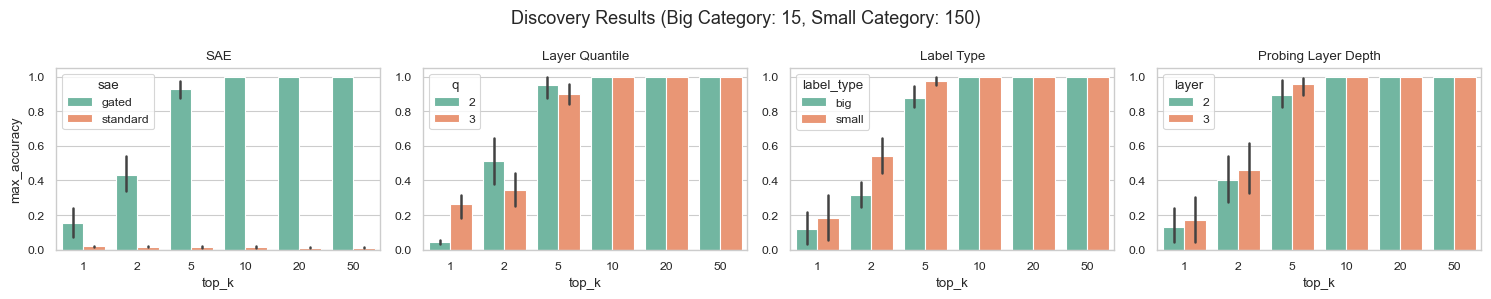

In [32]:
sns.set_style("whitegrid")
sns.set_context('paper')
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

sns.barplot(data=dfs, x='top_k', y='max_accuracy', hue='sae', palette='Set2', ax=axes[0])
df = dfs[(dfs['sae']=='gated')]
sns.barplot(data=df, x='top_k', y='max_accuracy', hue='q', palette='Set2', ax=axes[1], hue_order=sorted(df['q'].unique()))
sns.barplot(data=df, x='top_k', y='max_accuracy', hue='label_type', palette='Set2', ax=axes[2])
sns.barplot(data=df, x='top_k', y='max_accuracy', hue='layer', palette='Set2', ax=axes[3])
for i in range(1,4):
    # axes[i].set_xlabel('')
    axes[i].set_ylabel('')
fig.suptitle('Discovery Results (Big Category: 15, Small Category: 150)', fontsize=13)
axes[0].set_title('SAE')
axes[1].set_title('Layer Quantile')
axes[2].set_title('Label Type')
axes[3].set_title('Probing Layer Depth')
plt.tight_layout()
plt.savefig('assets/discovery_results.png', dpi=300)
plt.show()